# Анализ пользовательского взаимодействия с карточками статей в Яндекс.Дзен

* Подключение к удаленной базе данных
* Выгрузка данных из таблицы
* Передача данных для загрузки в Tableau
* Первичный анализ данных

## Подключение к удаленной базе данных

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
!pip install psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

# задаём параметры подключения к БД
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

# формируем строку соединения с БД
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

# подключаемся к БД
engine = create_engine(connection_string)

## Выгрузка данных

In [2]:
# формируем sql-запрос
query = ''' SELECT *
            FROM dash_visits
            '''


In [3]:
# выполняем запрос и сохраняем результат
# выполнения в DataFrame
dash_visits = pd.io.sql.read_sql(query, con = engine)

## Передача данных для загрузки в Tableau

In [4]:
# сохраняем таблицу на локальной машине
# для дальнейшей передачи данных в Tableau
dash_visits.to_csv('dash_visits.csv', sep='\t')

## Первичный анализ данных

In [5]:
# выводим первые 5 строк таблицы
display(dash_visits.head(5))

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


In [6]:
# выводим информацию о таблице
display(dash_visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


None

In [7]:
# проверяем минимальную дату события visit
display(dash_visits['dt'].min())

Timestamp('2019-09-24 18:28:00')

In [8]:
# проверяем максимальную дату события visit
display(dash_visits['dt'].max())

Timestamp('2019-09-24 19:00:00')

In [9]:
# проверяем общее кол-во визитов
display(dash_visits['visits'].sum())

310207

In [10]:
# проверяем кол-во уникальных значений item_topic
# выводим стат информацию
display(dash_visits['item_topic'].value_counts().describe())

count      25.000000
mean     1229.800000
std       193.308907
min       804.000000
25%      1119.000000
50%      1229.000000
75%      1385.000000
max      1536.000000
Name: item_topic, dtype: float64

In [20]:
# выводим кол-во визитов по каждой теме карточки (item_topic)
display(dash_visits.groupby('item_topic').agg({'visits':'sum'}).sort_values(by='visits', ascending=False)\
        .reset_index()\
        .rename(columns=({'item_topic':'тема карточки', 'visits':'кол-во взаимодействий'})).head(5))

,тема карточки,кол-во взаимодействий
0,Наука,21736
1,Отношения,20666
2,Интересные факты,19942
3,Общество,19640
4,Подборки,17772


In [11]:
# проверяем кол-во уникальных значений source_topic
# выводим стат информацию
display(dash_visits['source_topic'].value_counts().describe())

count      26.000000
mean     1182.500000
std       333.810156
min       667.000000
25%       976.000000
50%      1066.000000
75%      1453.500000
max      1822.000000
Name: source_topic, dtype: float64

In [23]:
# выводим кол-во визитов по каждой теме источника (source_topic)
display(dash_visits.groupby('source_topic').agg({'visits':'sum'}).sort_values(by='visits', ascending=False)\
        .reset_index()\
        .rename(columns=({'source_topic':'тема источника', 'visits':'кол-во взаимодействий'})).head(5))

,тема источника,кол-во взаимодействий
0,Семейные отношения,33309
1,Россия,29831
2,Полезные советы,27412
3,Путешествия,24124
4,Знаменитости,23945


In [12]:
# проверяем кол-во уникальных значений age_segment
# выводим стат информацию
display(dash_visits['age_segment'].value_counts().describe())

count       6.000000
mean     5124.166667
std      1376.074913
min      3254.000000
25%      4203.500000
50%      5328.500000
75%      5794.250000
max      7056.000000
Name: age_segment, dtype: float64

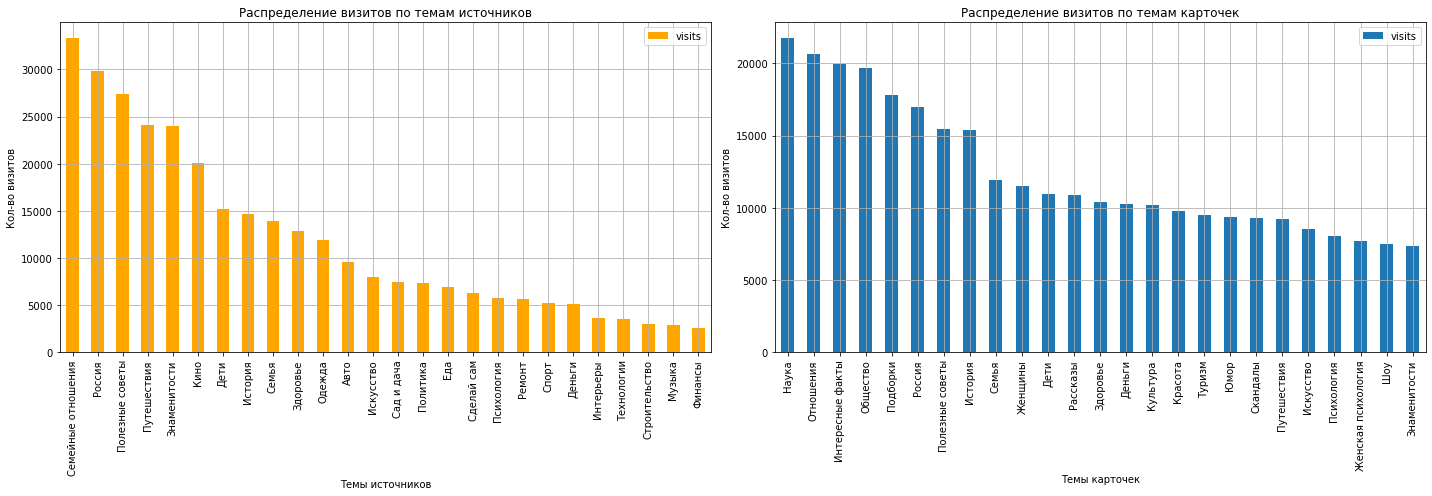

In [13]:
# проверяем распределение кол-ва визитов по темам карточек и источников
plt.figure(figsize=(20, 7))

ax2 = plt.subplot(1, 2, 2)
dash_visits.groupby('item_topic').agg({'visits':'sum'}).sort_values(by='visits', ascending=False)\
.plot(ax=ax2, kind='bar', grid=True)
plt.title('Распределение визитов по темам карточек')
plt.xlabel('Темы карточек')
plt.ylabel('Кол-во визитов')
plt.xticks(rotation=90)

ax1 = plt.subplot(1, 2, 1)
dash_visits.groupby('source_topic').agg({'visits':'sum'}).sort_values(by='visits', ascending=False)\
.plot(ax=ax1, kind='bar', grid=True, color = 'orange')
plt.title('Распределение визитов по темам источников')
plt.xlabel('Темы источников')
plt.ylabel('Кол-во визитов')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<Figure size 1080x504 with 0 Axes>

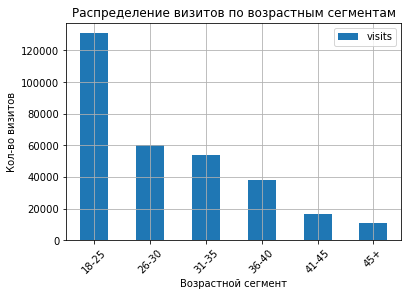

In [14]:
# проверяем распределение кол-ва визитов по возрастным сегментам
plt.figure(figsize=(15, 7))

dash_visits.groupby('age_segment').agg({'visits':'sum'}).sort_values(by='visits', ascending=False).plot(kind='bar', grid=True)
plt.title('Распределение визитов по возрастным сегментам')
plt.xlabel('Возрастной сегмент')
plt.ylabel('Кол-во визитов')
plt.xticks(rotation=45)

plt.show()

# Выводы

* Таблица, содержащая данные для построения дашборда содержит 30 745 записей и 6 колонок; не содержит пропусков.
* Данные собраны за период 2019-09-24 18:28:00 - 2019-09-24 19:00:00 (32 минуты)
* В изучаемый период было совершено 310 207 визитов пользователей.
* Темы карточек (item_topic) представлены 25 уникальными темами. Количество записей по темам находится в диапазоне от 804 до 1536.
* Темы источников (source_topic) представлены 26 уникальными источниками. Количество записей по темам находится в диапазоне от 667 до 1822.
* Возрастные сегменты (age_segment) представлены 6 уникальными сегментами. Количество записей по сегментам находится в диапазоне от 3254 до 7056.
* Наиболее популярными темами среди источников являются:
>
> Семейные отношения - 33 309 визитов
>
> Россия - 29 831 визит
>
> Полезные советы - 27 412 визитов
>
> Путешествия - 24 124 визита
>
> Знаменитости - 23 945 визитов
>
* Наиболее популярными темами среди карточек являются:
>
> Наука - 21 734 визита
>
> Отношения - 20 666 визитов
>
> Интересные факты - 19 942 визита
>
> Общество - 19 640 визитов
>
> Подборки - 17 772 визита
>
* Самым активным оказался самый молодой возрастной сегмент "18 - 25" лет, который за учетный период совершил более 120 000 визитов, а самым пассивным - самый взрослый сегмент "45+", совершивший в районе 10 000 визитов.